# Finance Data Project 


____
The focus is on bank stocks to see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Getting the Data

Reading the data directly from Google finance using pandas!

Starting with proper imports...

### The Imports


In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Data

Using pandas datareader I will get stock information data from Jan 1st 2006 to Jan 1st 2016 for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo


In [2]:
#Reading the Bank of America stock data from Google Analytics
BAC = data.DataReader("BAC", 'google', '2006-01-01','2016-01-01' )

In [3]:
# BofA's maximum opening data:
BAC[BAC['Open'].max()==BAC['Open']]

,Open,High,Low,Close,Volume
Date,,,,,
2006-11-21,55.04,55.05,54.51,54.72,9191500


In [4]:
# BofA's lowest opening date
BAC[BAC['Open'].min()==BAC['Open']]

,Open,High,Low,Close,Volume
Date,,,,,
2009-03-09,3.22,3.77,3.2,3.75,298868050


In [5]:
City = data.DataReader('C','google','2006-01-01','2016-01-01')

In [6]:
# Citi's maximum opening data:
City[City['Open'].max()==City['Open']]

,Open,High,Low,Close,Volume
Date,,,,,
2006-12-28,566.0,570.0,555.5,558.8,1530700


In [7]:
# Citi's maximum opening data:
City[City['Open'].min()==City['Open']]

,Open,High,Low,Close,Volume
Date,,,,,
2011-05-06,4.55,4.58,4.5,4.52,513178690


In [8]:
#Reading the Goldmann Sach's stock data from Google Analytics
GS = data.DataReader('GS','google','2006-01-01','2016-01-01')

In [9]:
GS[GS['Open'].max()==GS['Open']]

,Open,High,Low,Close,Volume
Date,,,,,
2007-11-01,243.55,244.41,238.75,240.21,12579896


In [10]:
GS[GS['Open'].min()==GS['Open']]

,Open,High,Low,Close,Volume
Date,,,,,
2008-11-20,54.0,57.54,49.0,52.0,55617937


In [11]:
JPM = data.DataReader('JPM','google','2006-01-01','2016-01-01')

In [12]:
JPM.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,39.83,40.36,39.30,40.19,12839400
2006-01-04,39.78,40.14,39.42,39.62,13491800
2006-01-05,39.61,39.81,39.50,39.74,8109400
2006-01-06,39.92,40.24,39.55,40.02,7966900
2006-01-09,39.88,40.72,39.88,40.67,16575200


In [13]:
JPM[JPM['Open'].max()==JPM['Open']]

,Open,High,Low,Close,Volume
Date,,,,,
2015-07-23,70.19,70.61,69.46,69.64,14331837


In [14]:
JPM[JPM['Open'].min()==JPM['Open']]

,Open,High,Low,Close,Volume
Date,,,,,
2009-03-09,15.37,17.29,15.02,15.9,132882830


In [15]:
# Reading the share market data of Morgan Stanley
MS = data.DataReader('MS','google','2006-01-01','2016-01-01')

In [16]:
MS.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,57.17,58.49,56.74,58.31,5377000
2006-01-04,58.70,59.28,58.35,58.35,7977800
2006-01-05,58.55,58.59,58.02,58.51,5778000
2006-01-06,58.77,58.85,58.05,58.57,6889800
2006-01-09,58.63,59.29,58.62,59.19,4144500


In [17]:
# Reading the share price of Wells Fargo
WFC = data.DataReader('WFC','google','2006-01-01','2016-01-01')

In [18]:
WFC.head()

,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,31.60,31.98,31.20,31.90,11016400
2006-01-04,31.80,31.82,31.36,31.53,10871000
2006-01-05,31.50,31.56,31.31,31.50,10158000
2006-01-06,31.58,31.78,31.38,31.68,8403800
2006-01-09,31.68,31.82,31.56,31.68,5619600


** Creating a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [19]:
tickers = ['BAC','City','GS','JPM','MS','WFC']
tickers= sorted(tickers)
tickers

['BAC', 'City', 'GS', 'JPM', 'MS', 'WFC']

In [20]:
# This is how the sorted function works to arrange the list automatically
x = ['a','m','b','ab']
x = sorted(x)
x

['a', 'ab', 'b', 'm']

** Using pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Setting the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [21]:
bank_stocks = pd.concat([BAC, City, GS, JPM, MS, WFC],keys = tickers, axis = 1)

In [22]:
bank_stocks.head()

BAC                                  City                       \
             Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                           
2006-01-03  46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04  47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05  46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06  46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09  46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

                       ...        MS                                  WFC  \
             Volume    ...      Open   High    Low  Close   Volume   Open   
Date                   ...                                                  
2006-01-03  1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04  1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05  1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06  1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09  1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

                                           
             High    Low  Close    Volume  
Date                                       
2006-01-03  31.98  31.20  31.90  11016400  
2006-01-04  31.82  31.36  31.53  10871000  
2006-01-05  31.56  31.31  31.50  10158000  
2006-01-06  31.78  31.38  31.68   8403800  
2006-01-09  31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

** Setting the column name levels:**

In [23]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Checking the head of the bank_stocks dataframe.**

In [24]:
bank_stocks.head()

Bank Ticker    BAC                                  City                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Exploring the data a bit! 

** What is the max Close price for each bank's stock throughout the time period?**

In [25]:
bank_stocks.max(numeric_only= float )

Bank Ticker  Stock Info
BAC          Open          5.504000e+01
             High          5.508000e+01
             Low           5.482000e+01
             Close         5.490000e+01
             Volume        1.226791e+09
City         Open          5.660000e+02
             High          5.700000e+02
             Low           5.555000e+02
             Close         5.641000e+02
             Volume        5.131787e+08
GS           Open          2.435500e+02
             High          2.507000e+02
             Low           2.400000e+02
             Close         2.479200e+02
             Volume        1.145906e+08
JPM          Open          7.019000e+01
             High          7.061000e+01
             Low           6.946000e+01
             Close         7.008000e+01
             Volume        2.172942e+08
MS           Open          9.077000e+01
             High          9.095000e+01
             Low           8.833000e+01
             Close         8.930000e+01
             Vol

** Creating a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** Using pandas pct_change() method on the Close column to create a column representing this return value. Creating first a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame. **

**Secondly, using Cross-Section Method to extract the required data.**

In [90]:
# Using a for loop to create a return percentage
bank_close = bank_stocks.xs('Close', level = 'Stock Info', axis = 1)
bank_close.columns.names = ['Closing Stock']
returns = pd.DataFrame()    
for tick in tickers:
    returns[tick+' returns'] = bank_close[tick].pct_change()                                

In [92]:
returns.head()

,BAC returns,City returns,GS returns,JPM returns,MS returns,WFC returns
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [26]:
# Closing price of all banks... Cross-Section method...
bank_close = bank_stocks.xs('Close', level = 'Stock Info', axis = 1)
bank_close.columns.names = ['Closing Stock']
bank_close.head()


Closing Stock,BAC,City,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,47.08,492.9,128.87,40.19,58.31,31.90
2006-01-04,46.58,483.8,127.09,39.62,58.35,31.53
2006-01-05,46.64,486.2,127.04,39.74,58.51,31.50
2006-01-06,46.57,486.2,128.84,40.02,58.57,31.68
2006-01-09,46.60,483.9,130.39,40.67,59.19,31.68


In [27]:
bank_BAC = bank_stocks.xs('BAC', level = 'Bank Ticker', axis = 1)
bank_BAC.head()

Stock Info,Open,High,Low,Close,Volume
Date,,,,,
2006-01-03,46.92,47.18,46.15,47.08,16296700
2006-01-04,47.00,47.24,46.45,46.58,17757900
2006-01-05,46.58,46.83,46.32,46.64,14970900
2006-01-06,46.80,46.91,46.35,46.57,12599800
2006-01-09,46.72,46.97,46.36,46.60,15620000


In [28]:
bank_returns = bank_close.pct_change()
bank_returns.columns.names = ['Return % stock']
bank_returns.head()

Return % stock,BAC,City,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Creating a pairplot using seaborn of the returns dataframe. Which stock stands out? **

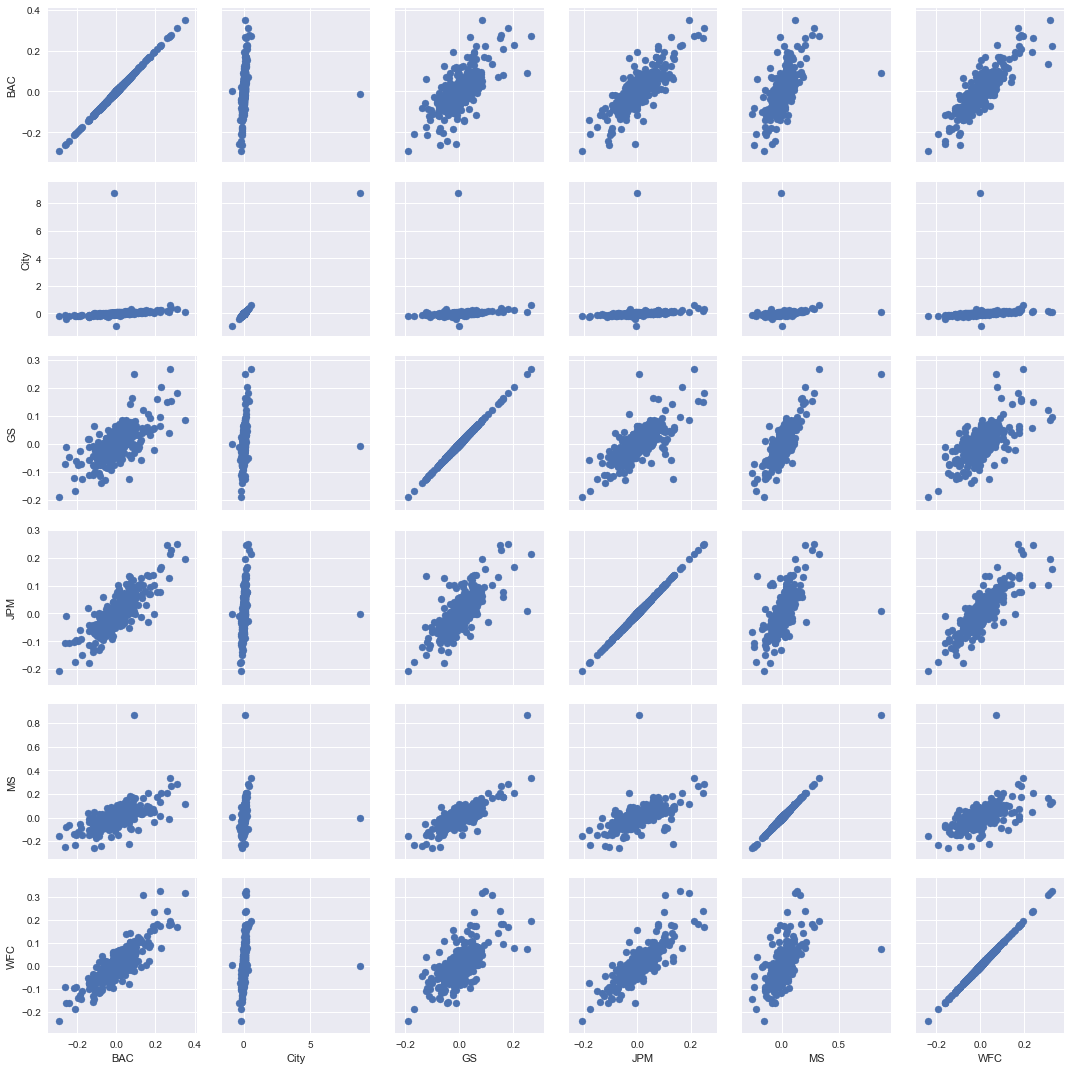

In [29]:
g = sns.PairGrid(bank_returns)
g.map(plt.scatter)

# Seems like the growth of CitiBank is not much great after the 2008 recession. Other bank are doing fairly good.

** Using this returns DataFrame, figuring out on what dates each bank stock had the best and worst single day returns.**

In [78]:
# The dates when the bank's had the minimum stock return
bank_returns.idxmin()

# 4 banks share the same day for the worst drop. Actually President Obama took the office on this day, shaking the market.

Return % stock
BAC    2009-01-20
City   2011-05-06
GS     2009-01-20
JPM    2009-01-20
MS     2008-10-09
WFC    2009-01-20
dtype: datetime64[ns]

In [77]:
# Dates when the stocks had the most return.
bank_returns.idxmax()

Return % stock
BAC    2009-04-09
City   2011-05-09
GS     2008-11-24
JPM    2009-01-21
MS     2008-10-13
WFC    2008-07-16
dtype: datetime64[ns]

In [30]:
bank_returns.head()

Return % stock,BAC,City,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


### Going little deeper

In [31]:
#Best return for Bank of America
bank_returns[bank_returns['BAC']==bank_returns['BAC'].max()]['BAC']

Date
2009-04-09    0.352691
Name: BAC, dtype: float64

In [32]:
# Worst return for Bank of America
bank_returns[bank_returns['BAC']==bank_returns['BAC'].min()]['BAC']

Date
2009-01-20   -0.289694
Name: BAC, dtype: float64

In [33]:
#Best return for CitiBank
bank_returns[bank_returns['City']==bank_returns['City'].max()]['City']

Date
2011-05-09    8.769912
Name: City, dtype: float64

In [34]:
# Worst for CityBank
bank_returns[bank_returns['City']==bank_returns['City'].min()]['City']

Date
2011-05-06   -0.899107
Name: City, dtype: float64

In [35]:
# Worst for Goldmann Sachs
bank_returns[bank_returns['GS']==bank_returns['GS'].min()]['GS']

Date
2009-01-20   -0.189596
Name: GS, dtype: float64

In [36]:
bank_returns[bank_returns['JPM']==bank_returns['JPM'].min()]['JPM']

Date
2009-01-20   -0.207274
Name: JPM, dtype: float64

In [37]:
# Worst for Morgan Stanley
bank_returns[bank_returns['MS']==bank_returns['MS'].min()]['MS']

Date
2008-10-09   -0.258929
Name: MS, dtype: float64

In [38]:
# Worst for Wells Fargo
bank_returns[bank_returns['WFC']==bank_returns['WFC'].min()]['WFC']

Date
2009-01-20   -0.238223
Name: WFC, dtype: float64

### So Wells Fargo, JP Morgan Chase, Bank of America and GoldMann Sachhs had the lowest return on 20th January, 2009.

In [39]:
bank_returns_new = bank_returns.reset_index()
bank_returns_new.head()

Return % stock,Date,BAC,City,GS,JPM,MS,WFC
0,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
1,2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2,2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
3,2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
4,2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


In [40]:
bank_returns_new[bank_returns_new['Date']== '2009-01-20']

Return % stock,Date,BAC,City,GS,JPM,MS,WFC
766,2009-01-20,-0.289694,-0.2,-0.189596,-0.207274,-0.159718,-0.238223


** Taking a look at the standard deviation of the returns and classifying the riskiest stock over the entire time period?** 

In [41]:
bank_returns.std()
# The riskiest bank of all times is CitiBank.

Return % stock
BAC     0.036650
City    0.179969
GS      0.025346
JPM     0.027656
MS      0.037820
WFC     0.030233
dtype: float64

**Which is the riskiest stock for the year 2015?**

In [67]:
#Direct Simpler way
bank_returns.ix['2015']['GS'].count()
# There are total 252 stocks return data in 2015.

252

In [72]:
# THis code shows the standard deviation for the bank returns. Higher the standard deviation more riskier the stock is.
# SO the riskiest stock is Bank of America
bank_returns.ix['2015'].std()

Return % stock
BAC     0.016163
City    0.015289
GS      0.014046
JPM     0.014017
MS      0.016249
WFC     0.012591
dtype: float64

### Long way to calculate the riskiest stock of 2015
#### Using a lambda expression

In [42]:
def year(x):
    if '2015' in x:
        return True
    else:
        return False
    
bank_returns_new['Year'] = bank_returns_new['Date'].apply(lambda x: x.year)
bank_returns_new.head()

Return % stock,Date,BAC,City,GS,JPM,MS,WFC,Year
0,2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN,2006
1,2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599,2006
2,2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951,2006
3,2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714,2006
4,2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000,2006


In [43]:
bank_returns_new['Date'].count()

2517

In [44]:
# Out of 2517 data, 252 are from year 2015 in which we are interested to find the riskiest bank of 2015 year.
bank_returns_2015 = bank_returns_new[bank_returns_new['Year'] == 2015]
bank_returns_2015.head()

Return % stock,Date,BAC,City,GS,JPM,MS,WFC,Year
2265,2015-01-02,0.000559,0.002772,0.002992,-0.001438,-0.002320,-0.002189,2015
2266,2015-01-05,-0.029050,-0.031515,-0.031223,-0.031045,-0.031258,-0.027422,2015
2267,2015-01-06,-0.029919,-0.035205,-0.020229,-0.025929,-0.028800,-0.020865,2015
2268,2015-01-07,0.004745,0.009270,0.014903,0.001526,0.014278,0.005951,2015
2269,2015-01-08,0.020661,0.015048,0.015965,0.022346,0.014889,0.022137,2015


In [45]:
bank_returns_2015['Date'].count()

252

In [46]:
bank_returns_2015.std()
# SO the riskiest bank in the year 2015 is Morgan Stanley [MS]

Return % stock
BAC     0.016163
City    0.015289
GS      0.014046
JPM     0.014017
MS      0.016249
WFC     0.012591
Year    0.000000
dtype: float64

** Creating a distplot using seaborn of the 2015 returns for Morgan Stanley **

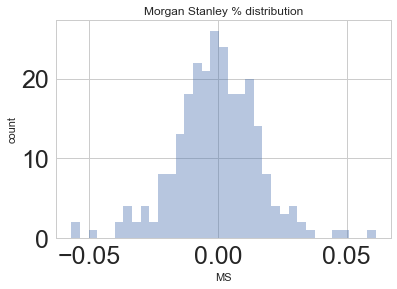

In [96]:
sns.distplot(bank_returns_2015['MS'], bins=35, kde =False)
plt.title('Morgan Stanley % distribution')
plt.ylabel('count')


** Creating a distplot using seaborn of the 2008 returns for CitiGroup **

([<matplotlib.axis.XTick at 0x19fcc8a47f0>,
 <a list of 12 Text xticklabel objects>)

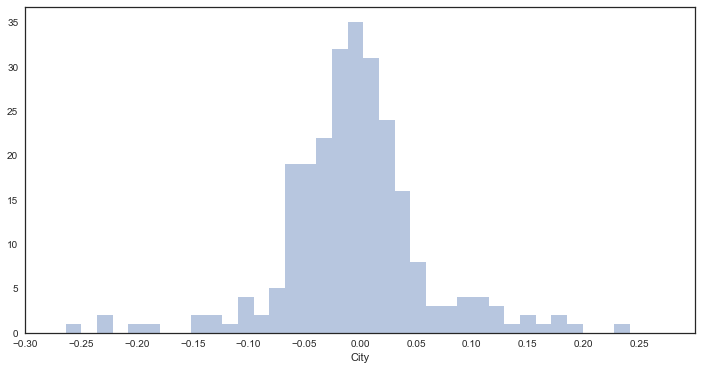

In [48]:
sns.set_style('white')
plt.figure(figsize=(12,6))
sns.distplot(bank_returns_new[bank_returns_new['Year'] == 2008]['City'], kde = False, bins=60)
plt.xlim((-0.3,0.3))
plt.xticks(np.arange(-0.3,0.3,0.05))

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Creating a line plot showing Close price for each bank for the entire index of time.**

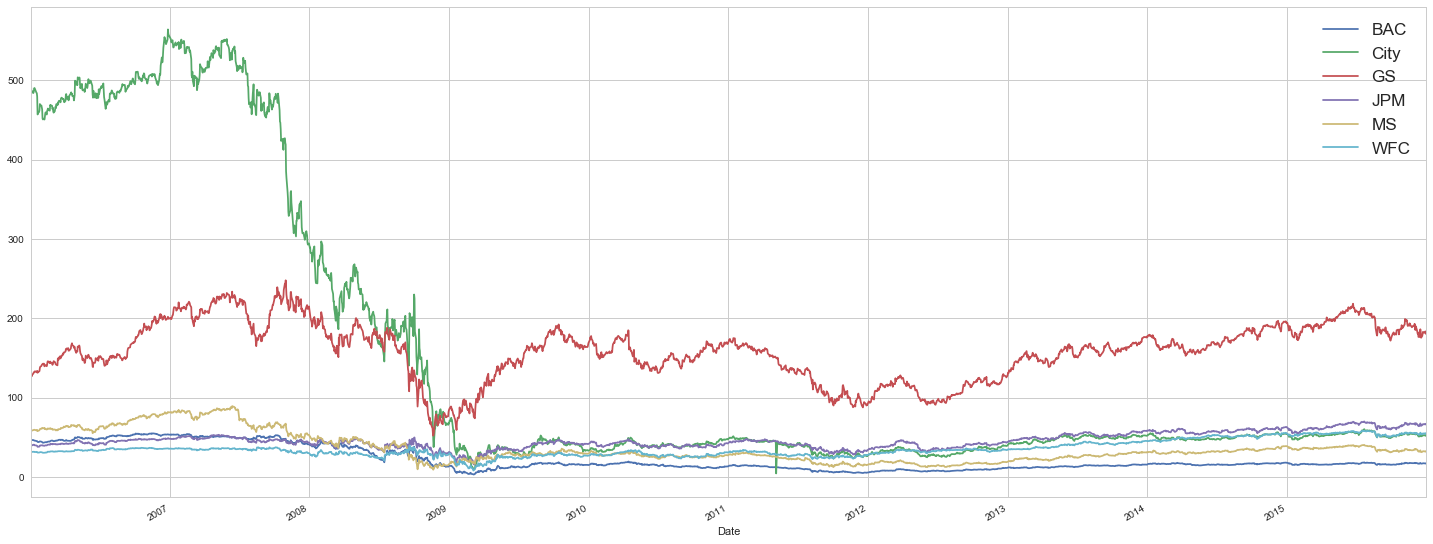

In [50]:
bank_close.plot(figsize=(25,10))
plt.legend(fontsize = 'xx-large')
plt.rc('xtick', labelsize=25) 

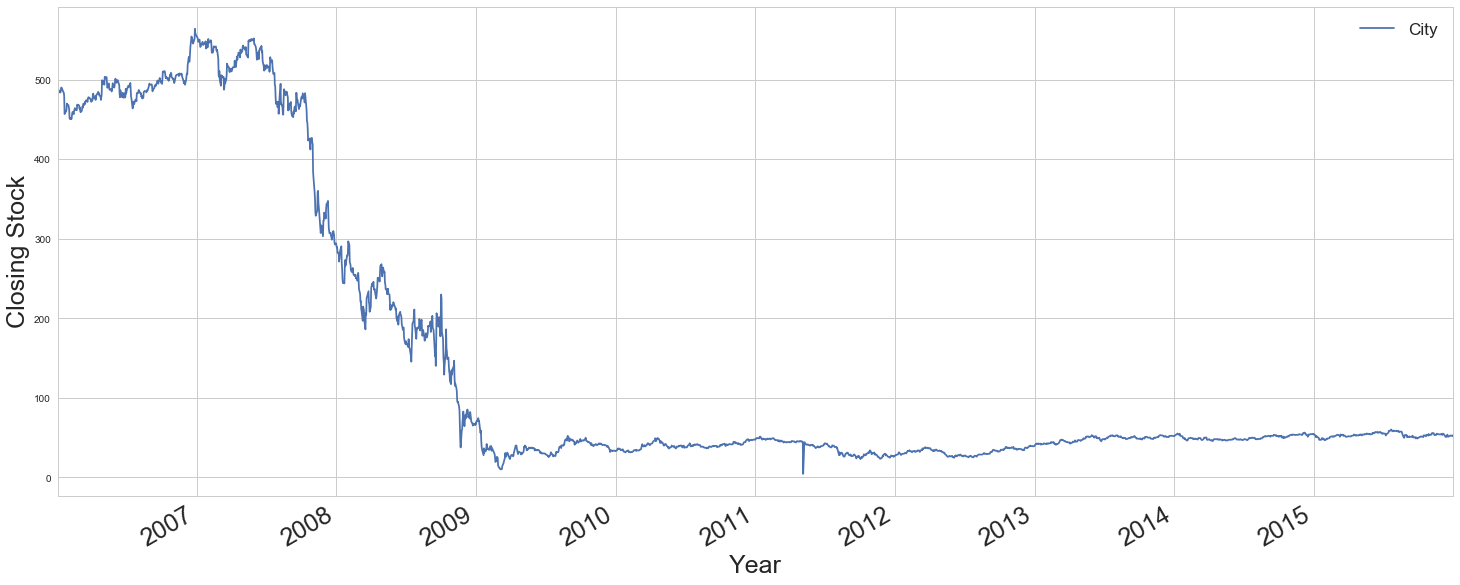

In [51]:
# Plotting the closing stocks of Citi Bank
bank_close['City'].plot(figsize=(25,10))
plt.legend(fontsize = 'xx-large')
plt.xlabel('Year', fontsize = 25)
plt.ylabel('Closing Stock', fontsize = 25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

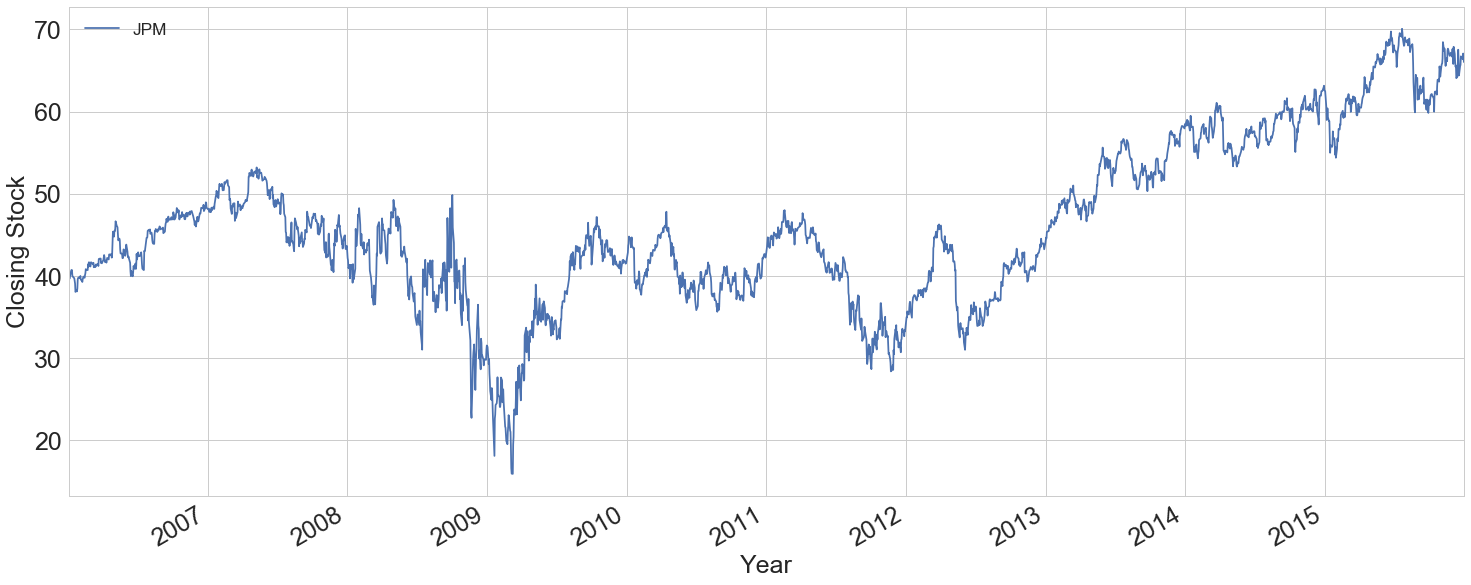

In [52]:
# Plotting the closing stocks of JP MOrgan-Chase
bank_close['JPM'].plot(figsize=(25,10))
plt.legend(fontsize = 'xx-large')
plt.xlabel('Year', fontsize = 25)
plt.ylabel('Closing Stock', fontsize = 25)
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)

** Creating a heatmap of the correlation between the stocks Close Price.**

In [57]:
bank_close.corr()

Return % stock,BAC,City,GS,JPM,MS,WFC
Return % stock,,,,,,
BAC,1.000000,0.971514,0.550950,0.103896,0.944219,0.008567
City,0.971514,1.000000,0.434171,0.003540,0.933605,-0.068441
GS,0.550950,0.434171,1.000000,0.685280,0.683834,0.499901
JPM,0.103896,0.003540,0.685280,1.000000,0.250441,0.940279
MS,0.944219,0.933605,0.683834,0.250441,1.000000,0.131864
WFC,0.008567,-0.068441,0.499901,0.940279,0.131864,1.000000


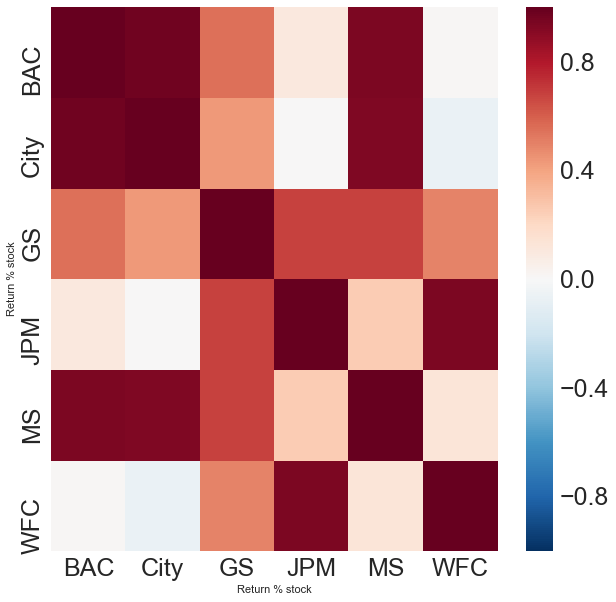

In [61]:
plt.figure(figsize=(10,10))
sns.heatmap(bank_close.corr())